In [2]:
import numpy as np
import helper
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.decomposition import NMF

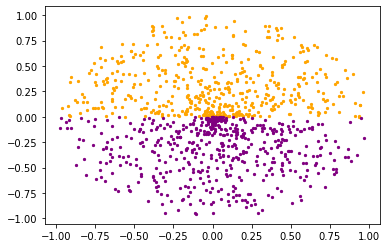

In [3]:
# Q1.a
points, labels = helper.create_dataset()
positive_sign_x = []
positive_sign_y = []
negative_sign_x = []
negative_sign_y = []


for i in range(len(labels)):
    if labels[i] == 1:
        positive_sign_x.append(points[i][1])
        positive_sign_y.append(points[i][2])
    else:
        negative_sign_x.append(points[i][1])
        negative_sign_y.append(points[i][2])

plt.scatter(positive_sign_x, positive_sign_y, color= "orange", s=5)
plt.scatter(negative_sign_x, negative_sign_y, color= "purple", s=5)
plt.show()


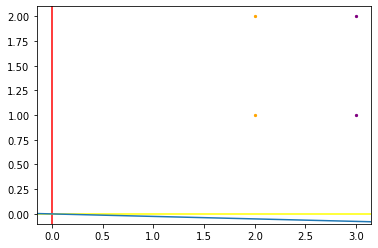

In [15]:
# Q1.b

w = [0, 0, 0]
for j in range(len(points)):
    y = points[j][0]*w[0] + points[j][1]*w[1] + points[j][2]*w[2]
    if np.sign(y) != labels[j]:
        w[0] += labels[j]*points[j][0]
        w[1] += labels[j]*points[j][1]
        w[2] += labels[j]*points[j][2]

a = - w[1]/w[2]
b = - w[0]/w[2]
fig, ax = plt.subplots()
plt.scatter(positive_sign_x, positive_sign_y, color= "orange", s=5)
plt.scatter(negative_sign_x, negative_sign_y, color= "purple", s=5)
ax.axline((0, b), slope=a, color='C0', label='seperator')
plt.show()


Function that seperates input points can be found in the following way. \
$f(x) = w^Tx = w_0x_0 + w_1x_1 + w_2x_2 = 0$ where $x_0 = 1$. 

If we divide both sides by $w_2$ we can see that slope of the function is equal to $-w_1/w_2$, \
and point this line intersects with $x_2$ axis is equal to $-w_0/w_2$.

So without bias ($w_0 = 0$), our seperator line will always intersect with $x_2$ axis on origin.

Therefore without bias, cases that cannot be seperated by a line crossing through the origin is not seperable.

As we can see from the example below, there is no way that the seperator can intersect with origin.


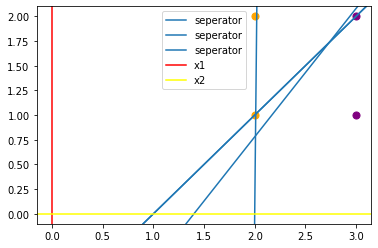

In [26]:
positive_sign_x = [2, 2]
positive_sign_y = [1, 2]
negative_sign_x = [3, 3]
negative_sign_y = [1, 2]

fig, ax = plt.subplots()
plt.scatter(positive_sign_x, positive_sign_y, color= "orange", s=50)
plt.scatter(negative_sign_x, negative_sign_y, color= "purple", s=50)
ax.axline((2, 1), slope=1, color='C0', label='seperator')
ax.axline((2, 1), slope=1.3, color='C0')
ax.axline((2, 1), slope=1.6, color='C0')
ax.axline((2, 1), slope=100, color='C0')

plt.axvline(x=0, c="red", label="x1")
plt.axhline(y=0, c="yellow", label="x2")
plt.legend()
plt.show()

In [6]:
#q2.a
x = np.zeros((10000,4096))
for i in range(10000):
    image = Image.open("../input/3dshapes_train/{}.jpg".format(i)).convert('L')
    x[i] = np.array(image).flatten()


In [7]:
#q2.b
t = np.load('../input/orientations_train.npy')
w_star=np.matmul(np.matmul(np.linalg.pinv(np.matmul(x.T, x)),x.T), t)
print(w_star)

[ 1.00039230e-02  1.25696314e-01  1.01217207e-02 ...  7.41265640e-04
  7.22007809e-05 -5.27847018e-04]


In [8]:
#q2.c
x_test = np.zeros((1000,4096))
for i in range(1000):
    image = Image.open("../input/3dshapes_test/{}.jpg".format(i)).convert('L')
    x_test[i] = np.array(image).flatten()
y_predict=np.matmul(x_test,w_star)
y_t = np.load('../input/orientations_test.npy')
total=0
for i in range(1000):
    total+=(y_t[i]-y_predict[i])**2
print("MSE is {}".format(total/1000))


MSE is 0.009443692559457225


In [9]:
#q2.d
nmf = NMF(n_components=100, init = 'random', tol=5e-3)
x = np.zeros((10000,4096))

for i in range(10000):
    image = Image.open("../input/3dshapes_train/{}.jpg".format(i)).convert('L')
    x[i] = np.array(image).flatten()
x_nmf=nmf.fit_transform(x)
print(x_nmf.shape)

t = np.load('../input/orientations_train.npy')
weights_star=np.matmul(np.matmul(np.linalg.pinv(np.matmul(x_nmf.T, x_nmf)),x_nmf.T), t) 

x_test = np.zeros((1000,4096))
for i in range(1000):
    image =  Image.open("../input/3dshapes_test//{}.jpg".format(i)).convert('L')
    x_test[i] = np.array(image).flatten()
x_test_nmf=nmf.transform(x_test)
y_predict=np.matmul(x_test_nmf,weights_star)
y_t = np.load('../input/orientations_test.npy')
total=0
for i in range(1000):
    total+=(y_t[i]-y_predict[i])**2
print("New MSE with dimensionality reduction is {}".format(total/1000))

(10000, 100)
New MSE with dimensionality reduction is 1.354011941338623
